Nama : Jeremia Manurung

NIM : 25/563379/PPA/07110

Kelas : Magister Ilmu Komputer

Mat.Kul : Pengolahan dan Analisis Citra Digital

### Question

Implementing following program from scratch

1. Convolution Function

2. Spatial Filtering with several kernel and discuss in which image case the kernel is suitable for

3. Sharpening with blurring operation

4. Make discussion in the end of COLAB, in which case the filtering should be used instead of pixel-based method.

Create your notebook with name as "PCD_Assignment02" and upload to GitHub. You need to provide your GitHub's code link to the text editor in submission form.

### Answer

# 1. Convolution Function


In [1]:
import numpy as np

In [2]:
def convolution(image, kernel, padding=0):
    image_padded = np.pad(image, padding, mode='constant')

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image_padded.shape

    imheight = image.shape[0]
    imwidth = image.shape[1]

    output = np.zeros((imheight, imwidth))

    for y in range(0, imheight):
        for x in range(0, imwidth):
            region = image_padded[y:y+kernel_height, x:x+kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

# 2. Spatial Filtering with several kernel and discuss in which image case the kernel is suitable for



### Original image

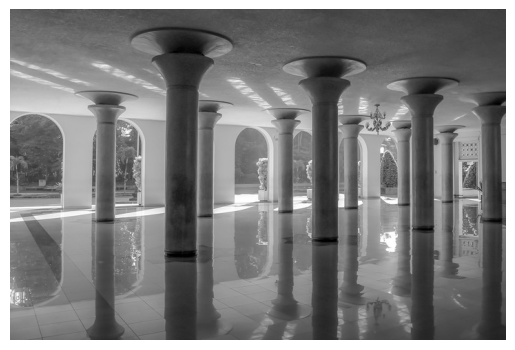

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

img=Image.open('./images/gambar.jpg')
img = np.array(img)
h, w = len(img), len(img[0])

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### 2.1. Mean Filter (Averaging Filter) 5x5

digunakan untuk menghilangkan noise (*denoising*)

In [4]:
kernel = (1/25) * np.array([[1, 1, 1, 1, 1, ], [1, 1, 1, 1, 1, ], [1, 1, 1, 1, 1, ], [1, 1, 1, 1, 1, ], [1, 1, 1, 1, 1, ] ])

In [5]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

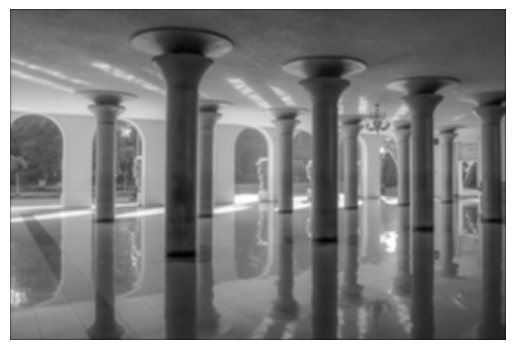

In [6]:
plt.figure()
plt.imshow(convolution(img, kernel, 2), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### 2.2 Gaussian Filter 3x3

digunakan untuk menghasilkan efek blur dan menghilangkan noise (*denoising*)

In [7]:
kernel = (1/16) * np.array(([1,2,1], [2,4,2], [1,2,1]))

In [8]:
kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

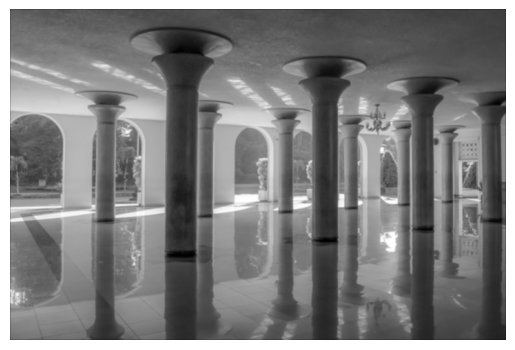

In [9]:
plt.figure()
plt.imshow(convolution(img, kernel, 1), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

### 2.4 Kernel Sharpen 3x3

digunakam untuk menonjolkan detail atau struktur halus pada citra.

In [10]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [11]:
convolution(img, kernel, 1)

array([[287., 191., 195., ..., 119., 122., 194.],
       [182.,  88.,  91., ...,  60.,  63., 128.],
       [188.,  93.,  91., ...,  61.,  65., 133.],
       ...,
       [224., 112., 110., ...,  38.,  35.,  77.],
       [221., 109., 114., ...,  37.,  40.,  75.],
       [333., 222., 220., ...,  74.,  76., 119.]])

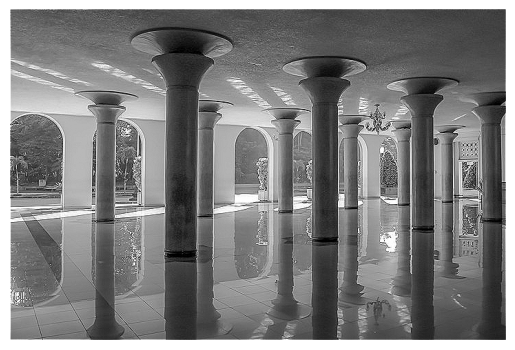

In [12]:
plt.figure()
plt.imshow(convolution(img, kernel, 1), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# 3. Sharpening with blurring operation

### Original image

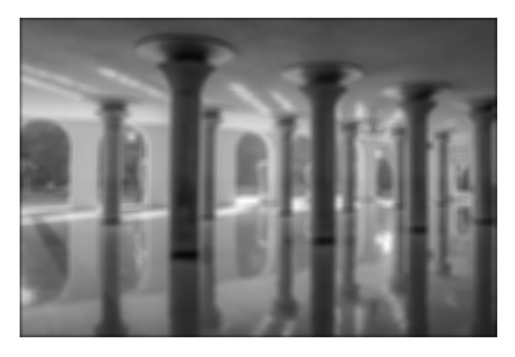

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

img=Image.open('./images/blur.jpg')
img = np.array(img)
h, w = len(img), len(img[0])

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [14]:
kernel = (1/121) * np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ],  ])

In [15]:
blurred = convolution(img, kernel, 5)

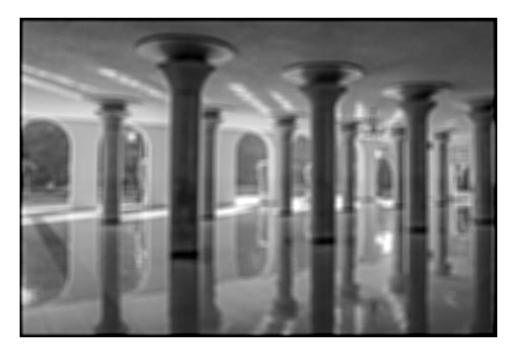

In [16]:
plt.figure()
plt.imshow(img + (img - blurred), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# 4. Make discussion in the end of COLAB, in which case the filtering should be used instead of pixel-based method.



Metode filtering dipilih ketika task yang akan dikerjakan memerlukan informasi tentang konteks spasial atau hubungan antar pixel. Contohnya seperti task pengurangan noise *(denioising)* dan smoothing, deteksi tepi, sharpening  dan lainnya.